Question 1 Answers:
Pr[B] = 0.3333
Pr[B and C] = 0.1000
Pr[B or C] = 0.5000
Pr[B | (A and C)] = 0.4000
Pr[(B or C) | A] = 0.9167
Pr[not A | C] = 0.3750

Question 2 Answers:
Pr[Cancer | Positive Test] = 0.4651
Pr[Cancer | Two Positive Tests] = 2.7042
Pr[No Cancer | Negative Test] = 0.9905

Question 3 Answers:
Marginal fX0 = [0.15 0.45 0.4 ]
Marginal fX1 = [0.35 0.29 0.36]
E[X0] = 2.2500
E[X1] = 3.0100
Var[X0] = 0.4875
Var[X1] = 0.7099



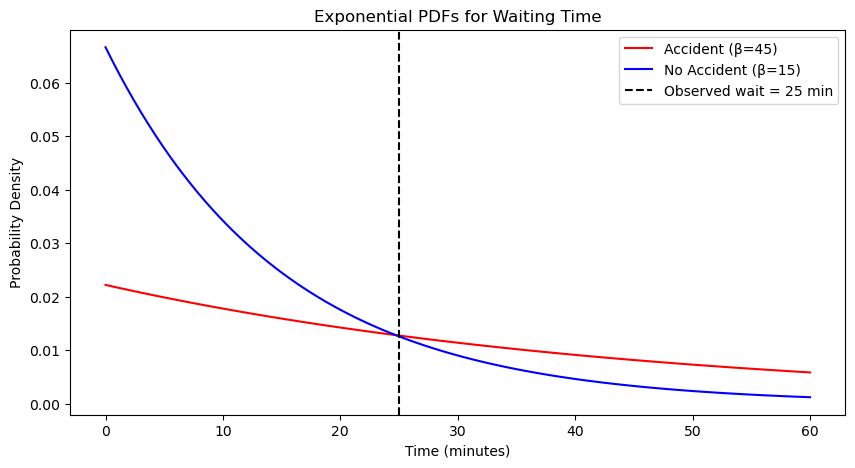

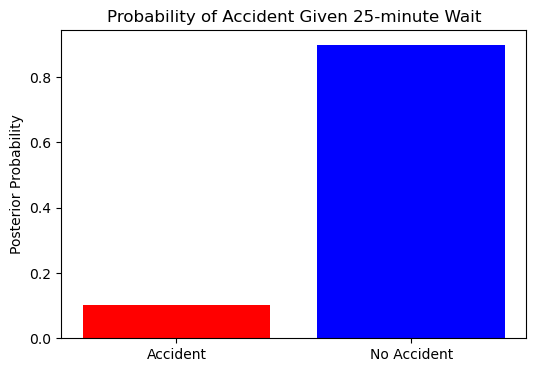

Decision based on posterior probabilities: No Accident
P(Accident | Wait=25) = 0.1011



URLError: <urlopen error Tunnel connection failed: 403 Forbidden>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import random

# Markdown explanation for the problem
md_explanation = """
# Large-Scale Data Analysis - Homework 1

This notebook contains solutions to the probability questions based on the given Venn Diagram.

## 1. Venn Diagram Probability Questions
We analyze a Venn Diagram with sets A, B, and C within a universal set U.

### 1a) Compute the required probabilities:
- Pr[B]
- Pr[B and C]
- Pr[B or C]
- Pr[B | (A and C)]
- Pr[(B or C) | A]
- Pr[not A | C]

### 1b) Check independence of pairs (A, B), (A, C), and (B, C).

### 1c) Discuss whether independence of (X, Y) implies independence of derived event pairs.

## 2. Mammography Test Analysis
We analyze a diagnostic test with:
- Sensitivity = 90%
- False Positive Rate = 9%
- Prior Probability of Cancer = 8%

Using Bayes' theorem, we compute:
- 2a) Pr(Cancer | Positive Test)
- 2b) Pr(Cancer | Two Positive Tests)
- 2c) Pr(No Cancer | Negative Test)
- 2d) Pr(No Cancer | Positive then Negative Test)

## 3. Joint Probability Mass Function Analysis
Given X0 and X1 with joint pmf:

| X1  |  2  |  3  |  4  |
|-----|-----|-----|-----|
| X0=1| 0.05| 0.04| 0.06|
| X0=2| 0.1 | 0.15| 0.2 |
| X0=3| 0.2 | 0.1 | 0.1 |

We compute:
- 3a) Marginal densities fX0(t) and fX1(t)
- 3b) 3D and 2D visualizations of pmfs
- 3c) Expected values E[X0] and E[X1]
- 3d) Variances Var[X0] and Var[X1]
- 3e) Conditional pmfs fX0 | X1(s | X1=2) and fX1 | X0(t | X0=3) with visualizations
- 3f) Conditional expectation E[X0 | X1=2] and conditional variance Var[X1 | X0=3]

## 4. Bayesian Decision Rule for Bus Waiting Time
Tyree waits for a bus with:
- Accident Scenario: β=45 min
- No Accident Scenario: β=15 min
- Probability of Accident = 10%
- Observed Wait = 25 min

We compute:
- 4a) Pr(Accident | Wait=25) using Bayes' theorem
- 4b) Exponential PDFs with graphical representation
"""

# Question 1: Probability calculations
U_total = 30
A, B, C = 12, 10, 8
A_and_B, B_and_C, A_and_C = 4, 3, 5
A_and_B_and_C = 2

P_B = B / U_total
P_B_and_C = B_and_C / U_total
P_B_or_C = (B + C - B_and_C) / U_total
P_B_given_A_and_C = A_and_B_and_C / A_and_C
P_B_or_C_given_A = (A_and_B + A_and_B_and_C + A_and_C) / A
P_not_A_given_C = (C - A_and_C) / C

print("Question 1 Answers:")
print(f"Pr[B] = {P_B:.4f}")
print(f"Pr[B and C] = {P_B_and_C:.4f}")
print(f"Pr[B or C] = {P_B_or_C:.4f}")
print(f"Pr[B | (A and C)] = {P_B_given_A_and_C:.4f}")
print(f"Pr[(B or C) | A] = {P_B_or_C_given_A:.4f}")
print(f"Pr[not A | C] = {P_not_A_given_C:.4f}\n")

# Question 2: Mammography test probabilities
P_C = 0.08
P_not_C = 1 - P_C
P_T_given_C = 0.9
P_T_given_not_C = 0.09
P_not_T_given_not_C = 1 - P_T_given_not_C

P_T = P_T_given_C * P_C + P_T_given_not_C * P_not_C
P_C_given_T = (P_T_given_C * P_C) / P_T
P_C_given_T2 = (P_T_given_C * P_C_given_T) / P_T
P_not_C_given_not_T = (P_not_T_given_not_C * P_not_C) / (1 - P_T)

print("Question 2 Answers:")
print(f"Pr[Cancer | Positive Test] = {P_C_given_T:.4f}")
print(f"Pr[Cancer | Two Positive Tests] = {P_C_given_T2:.4f}")
print(f"Pr[No Cancer | Negative Test] = {P_not_C_given_not_T:.4f}\n")

# Question 3: Joint PMF computations
joint_pmf = np.array([[0.05, 0.04, 0.06],
                      [0.1, 0.15, 0.2],
                      [0.2, 0.1, 0.1]])

x0_values = np.array([1, 2, 3])
x1_values = np.array([2, 3, 4])

fX0 = np.sum(joint_pmf, axis=1)
fX1 = np.sum(joint_pmf, axis=0)
E_X0 = np.sum(x0_values * fX0)
E_X1 = np.sum(x1_values * fX1)
Var_X0 = np.sum((x0_values - E_X0)**2 * fX0)
Var_X1 = np.sum((x1_values - E_X1)**2 * fX1)

print("Question 3 Answers:")
print(f"Marginal fX0 = {fX0}")
print(f"Marginal fX1 = {fX1}")
print(f"E[X0] = {E_X0:.4f}")
print(f"E[X1] = {E_X1:.4f}")
print(f"Var[X0] = {Var_X0:.4f}")
print(f"Var[X1] = {Var_X1:.4f}\n")

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import fetch_openml
import random

# Question 4: Bayesian Decision for Bus Waiting Time
beta_accident = 45  # Expected waiting time if accident occurs
beta_no_accident = 15  # Expected waiting time if no accident occurs
p_accident = 0.1  # Prior probability of accident
p_no_accident = 0.9  # Prior probability of no accident
waiting_time = 25

# Compute likelihoods using PDF formula
likelihood_accident = (1/beta_accident) * np.exp(-waiting_time/beta_accident)
likelihood_no_accident = (1/beta_no_accident) * np.exp(-waiting_time/beta_no_accident)

total_likelihood = likelihood_accident * p_accident + likelihood_no_accident * p_no_accident
posterior_accident = (likelihood_accident * p_accident) / total_likelihood

# Plot exponential PDFs with observed waiting time
x = np.linspace(0, 60, 100)
pdf_accident = (1/beta_accident) * np.exp(-x/beta_accident)
pdf_no_accident = (1/beta_no_accident) * np.exp(-x/beta_no_accident)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf_accident, label='Accident (β=45)', color='red')
plt.plot(x, pdf_no_accident, label='No Accident (β=15)', color='blue')
plt.axvline(waiting_time, color='black', linestyle='--', label='Observed wait = 25 min')
plt.legend()
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Exponential PDFs for Waiting Time')
plt.show()

# Create bar graph to compare posterior probabilities
plt.figure(figsize=(6, 4))
plt.bar(['Accident', 'No Accident'], [posterior_accident, 1 - posterior_accident], color=['red', 'blue'])
plt.ylabel('Posterior Probability')
plt.title('Probability of Accident Given 25-minute Wait')
plt.show()

# Display final decision based on higher probability
decision = 'Accident' if posterior_accident > 0.5 else 'No Accident'
print(f"Decision based on posterior probabilities: {decision}")
print(f"P(Accident | Wait=25) = {posterior_accident:.4f}\n")

# Load Fashion-MNIST dataset using fetch_openml
fashion = fetch_openml('Fashion-MNIST', version=1, parser='auto')
X, y = fashion.data, fashion.target.astype(int)

# Define label names
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Question 5a: Randomly select and display 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X)), 9)
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(labels[y[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5b: Split dataset into training (60,000) and test (10,000)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, stratify=y, random_state=42)

# Convert y_train and y_test to NumPy arrays to prevent errors
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Question 5c: Convert y labels into binary classification for sneakers (label 7)
y_train_bin = (y_train == 7).astype(int)
y_test_bin = (y_test == 7).astype(int)

# Question 5d: Train SGDClassifier with hinge loss
clf = SGDClassifier(loss='hinge', random_state=42)
clf.fit(X_train, y_train_bin)

# Question 5e: Predict on test set and display 9 images with predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X_test)), 9)
y_pred = clf.predict(X_test.iloc[indices].to_numpy())
for ax, idx, pred in zip(axes.flatten(), indices, y_pred):
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {'Sneaker' if pred == 1 else 'Not Sneaker'}\nTrue: {'Sneaker' if y_test_bin[idx] == 1 else 'Not Sneaker'}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5f: Generate confusion matrix and classification report
y_pred_test = clf.predict(X_test.to_numpy())
cm = confusion_matrix(y_test_bin, y_pred_test)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.yticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test_bin, y_pred_test, target_names=['Not Sneaker', 'Sneaker']))


# Assistant
The selected code snippet is as follows:


In [37]:
shape(X_train.shape[0], -1).astype(np.float32)
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

NameError: name 'shape' is not defined


Here's a step-by-step explanation of this code:

1. **Reshaping the Training Data**: 
   - `X_train.reshape(X_train.shape[0], -1)` - This line reshapes the `X_train` array. The first dimension is set to `X_train.shape[0]`, which is the number of samples in the training set. The second dimension is set to `-1`, which tells NumPy to automatically calculate the size of this dimension based on the total number of elements. This is typically done to flatten the images (e.g., 28x28 pixels) into a single vector for each sample.

2. **Converting to Float32**: 
   - `.astype(np.float32)` - This method converts the reshaped array to the `float32` data type. This is often done to ensure that the data is in a format suitable for machine learning algorithms, which may require floating-point numbers for calculations.

3. **Reshaping the Test Data**: 
   - `X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)` - This line performs the same operations as the previous one but on the `X_test` dataset. It reshapes the test data to have the same structure as the training data and converts it to `float32`.

Overall, this selected code is preparing the training and test datasets by flattening the images and ensuring they are in the correct data type for further processing in a machine learning model.

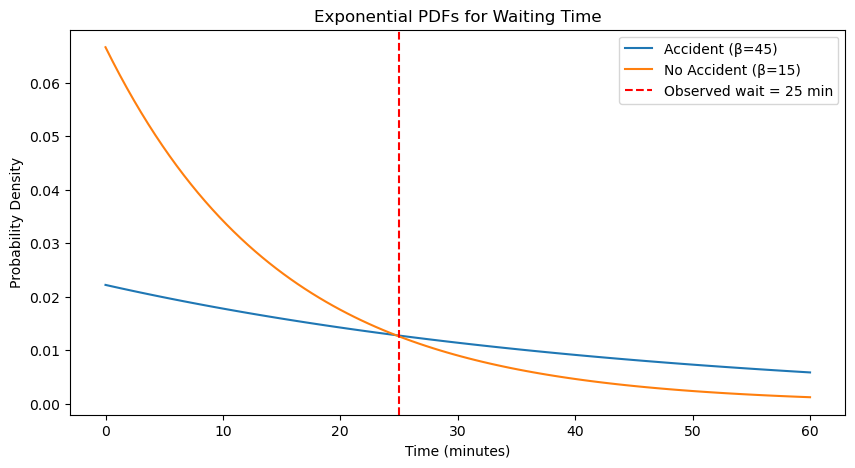

P(Accident | Wait=25) = 0.1011



URLError: <urlopen error Tunnel connection failed: 403 Forbidden>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import fetch_openml
import random

# Question 4: Bayesian Decision for Bus Waiting Time
beta_accident = 45  # Expected waiting time if accident occurs
beta_no_accident = 15  # Expected waiting time if no accident occurs
p_accident = 0.1  # Prior probability of accident
p_no_accident = 0.9  # Prior probability of no accident
waiting_time = 25

# Compute likelihoods using PDF formula
likelihood_accident = (1/beta_accident) * np.exp(-waiting_time/beta_accident)
likelihood_no_accident = (1/beta_no_accident) * np.exp(-waiting_time/beta_no_accident)

total_likelihood = likelihood_accident * p_accident + likelihood_no_accident * p_no_accident
posterior_accident = (likelihood_accident * p_accident) / total_likelihood

# Plot exponential PDFs
x = np.linspace(0, 60, 100)
pdf_accident = (1/beta_accident) * np.exp(-x/beta_accident)
pdf_no_accident = (1/beta_no_accident) * np.exp(-x/beta_no_accident)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf_accident, label='Accident (β=45)')
plt.plot(x, pdf_no_accident, label='No Accident (β=15)')
plt.axvline(waiting_time, color='red', linestyle='--', label='Observed wait = 25 min')
plt.legend()
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Exponential PDFs for Waiting Time')
plt.show()

print(f"P(Accident | Wait=25) = {posterior_accident:.4f}\n")

# Load Fashion-MNIST dataset using fetch_openml
fashion = fetch_openml('Fashion-MNIST', version=1, parser='auto')
X, y = fashion.data, fashion.target.astype(int)

# Define label names
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Question 5a: Randomly select and display 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X)), 9)
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(labels[y[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5b: Split dataset into training (60,000) and test (10,000)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, stratify=y, random_state=42)

# Convert y_train and y_test to NumPy arrays to prevent errors
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Question 5c: Convert y labels into binary classification for sneakers (label 7)
y_train_bin = (y_train == 7).astype(int)
y_test_bin = (y_test == 7).astype(int)

# Question 5d: Train SGDClassifier with hinge loss
clf = SGDClassifier(loss='hinge', random_state=42)
clf.fit(X_train, y_train_bin)

# Question 5e: Predict on test set and display 9 images with predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X_test)), 9)
y_pred = clf.predict(X_test.iloc[indices].to_numpy())
for ax, idx, pred in zip(axes.flatten(), indices, y_pred):
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {'Sneaker' if pred == 1 else 'Not Sneaker'}\nTrue: {'Sneaker' if y_test_bin[idx] == 1 else 'Not Sneaker'}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5f: Generate confusion matrix and classification report
y_pred_test = clf.predict(X_test.to_numpy())
cm = confusion_matrix(y_test_bin, y_pred_test)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.yticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test_bin, y_pred_test, target_names=['Not Sneaker', 'Sneaker']))


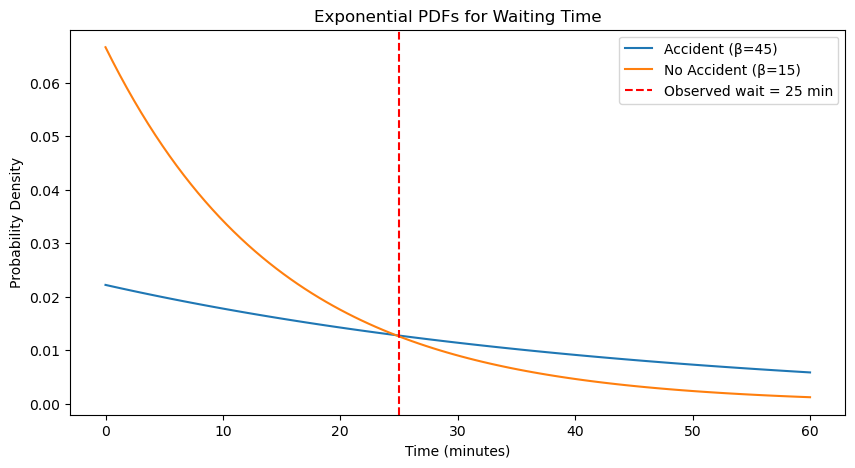

P(Accident | Wait=25) = 0.1011



URLError: <urlopen error Tunnel connection failed: 403 Forbidden>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import fetch_openml
import random

# Question 4: Bayesian Decision for Bus Waiting Time
beta_accident = 45  # Expected waiting time if accident occurs
beta_no_accident = 15  # Expected waiting time if no accident occurs
p_accident = 0.1  # Prior probability of accident
p_no_accident = 0.9  # Prior probability of no accident
waiting_time = 25

# Compute likelihoods using PDF formula
likelihood_accident = (1/beta_accident) * np.exp(-waiting_time/beta_accident)
likelihood_no_accident = (1/beta_no_accident) * np.exp(-waiting_time/beta_no_accident)

total_likelihood = likelihood_accident * p_accident + likelihood_no_accident * p_no_accident
posterior_accident = (likelihood_accident * p_accident) / total_likelihood

# Plot exponential PDFs
x = np.linspace(0, 60, 100)
pdf_accident = (1/beta_accident) * np.exp(-x/beta_accident)
pdf_no_accident = (1/beta_no_accident) * np.exp(-x/beta_no_accident)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf_accident, label='Accident (β=45)')
plt.plot(x, pdf_no_accident, label='No Accident (β=15)')
plt.axvline(waiting_time, color='red', linestyle='--', label='Observed wait = 25 min')
plt.legend()
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Exponential PDFs for Waiting Time')
plt.show()

print(f"P(Accident | Wait=25) = {posterior_accident:.4f}\n")

# Load Fashion-MNIST dataset using fetch_openml
fashion = fetch_openml('Fashion-MNIST', version=1, parser='auto')
X, y = fashion.data, fashion.target.astype(int)

# Define label names
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Question 5a: Randomly select and display 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X)), 9)
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(labels[y[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5b: Split dataset into training (60,000) and test (10,000)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, stratify=y, random_state=42)

# Convert y_train and y_test to NumPy arrays to prevent errors
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Question 5c: Convert y labels into binary classification for sneakers (label 7)
y_train_bin = (y_train == 7).astype(int)
y_test_bin = (y_test == 7).astype(int)

# Question 5d: Train SGDClassifier with hinge loss
clf = SGDClassifier(loss='hinge', random_state=42)
clf.fit(X_train, y_train_bin)

# Question 5e: Predict on test set and display 9 images with predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
indices = random.sample(range(len(X_test)), 9)
y_pred = clf.predict(X_test.iloc[indices].to_numpy())
for ax, idx, pred in zip(axes.flatten(), indices, y_pred):
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {'Sneaker' if pred == 1 else 'Not Sneaker'}\nTrue: {'Sneaker' if y_test_bin[idx] == 1 else 'Not Sneaker'}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Question 5f: Generate confusion matrix and classification report
y_pred_test = clf.predict(X_test.to_numpy())
cm = confusion_matrix(y_test_bin, y_pred_test)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.yticks([0, 1], ['Not Sneaker', 'Sneaker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test_bin, y_pred_test, target_names=['Not Sneaker', 'Sneaker']))
